In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

#Initialize  t, y and arrays

In [2]:
# Stores data regarding the current and past states of a single pendulum
class Pendulum:
    def __init__(self, theta0, vel0):
        # Angular velocity
        self.vel = [vel0]
        # Angular position
        self.theta = [theta0]
        # Vector of timesteps
        self.t = [0,dt]
        # Initialize velocity and position with the Euler integration 
        # scheme
        accel = calAccel(self, theta0);
        self.vel.append(self.vel[-1]+accel*dt);
        self.theta.append(self.theta[-1]+self.vel[-1]*dt);


In [3]:
# Purpose: Calculate the acceleration of a driven, damped pendulum,
# given its current angular position and the current simulation time
# Arguments: A Pendulum object and the Pendulum's current angle
# Retuns: The acceleration of the pendulum at this point in time
def calAccelDrivenDamped(pend, theta):
    accel = -(k**2)*math.sin(theta)+ \
              gamma*(k**2)*math.sin(pend.t[-1]*omega) - \
              beta*pend.vel[-1]
    return accel

# Purpose: Calculate the acceleration of a driven pendulum, given its
# current angular position and the current simulation time
# Arguments: A Pendulum object and the Pendulum's current angle
# Retuns: The acceleration of the pendulum at this point in time
def calAccelDriven(pend, theta):
    accel = -(k**2)*math.sin(theta)+ \
              gamma*(k**2)*math.sin(pend.t[-1]*omega)
    return accel

# Purpose: Calculate the acceleration of an undriven pendulum, given its
# current angular position and the current simulation time
# Arguments: A Pendulum object and the Pendulum's current angle
# Retuns: The acceleration of the pendulum at this point in time
def calAccel(pend, theta):
    accel = -(k**2)*math.sin(theta)
    return accel

# Purpose: Calculate the acceleration of an undriven pendulum, given its
# current angular position and the current simulation time, based on a
# linear model
# Arguments: A Pendulum object and the Pendulum's current angle
# Retuns: The acceleration of the pendulum at this point in time
def calAccelLinear(pend, theta):
    accel = -(k**2)*theta
    return accel

# Purpose: Perform a single step in a Bashforth-Adams integration of a
# driven, damped simple pendulum
# Arguments: The Pendulum to integrate over
# Returns: The same Pendulum, one integration step further on
def bashforthAdamsDrivenDamped(pend):
    vn = pend.vel[-1] + 1.5*dt*calAccelDrivenDamped(pend, \
         pend.theta[-1]) - 0.5*dt* \
         calAccelDrivenDamped(pend, pend.theta[-2])
    thn = pend.theta[-1] + 1.5*dt*pend.vel[-1] - 0.5*dt*pend.vel[-2]
    pend.vel.append(vn)
    pend.theta.append(thn)
    return pend
    
# Purpose: Perform a single step in a Bashforth-Adams integration of a
# driven simple pendulum
# Arguments: The Pendulum to integrate over
# Returns: The same Pendulum, one integration step further on
def bashforthAdamsDriven(pend):
    vn = pend.vel[-1] + 1.5*dt*calAccelDriven(pend, pend.theta[-1]) - \
         0.5*dt*calAccelDriven(pend, pend.theta[-2])
    thn = pend.theta[-1] + 1.5*dt*pend.vel[-1] - 0.5*dt*pend.vel[-2]
    pend.vel.append(vn)
    pend.theta.append(thn)
    return pend

# Purpose: Perform a single step in a Bashforth-Adams integration of a
# simple pendulum
# Arguments: The Pendulum to integrate over
# Returns: The same Pendulum, one integration step further on
def bashforthAdams(pend):
    vn = pend.vel[-1] + 1.5*dt*calAccel(pend, pend.theta[-1]) - \
         0.5*dt*calAccel(pend, pend.theta[-2])
    thn = pend.theta[-1] + 1.5*dt*pend.vel[-1] - 0.5*dt*pend.vel[-2]
    pend.vel.append(vn)
    pend.theta.append(thn)   
    return pend

# Purpose: Perform a single step in a linearBashforth-Adams integration
# of a simple pendulum
# Arguments: The Pendulum to integrate over
# Returns: The same Pendulum, one integration step further on
def bashforthAdamsLinear(pend):
    vn = pend.vel[-1] + 1.5*dt*calAccelLinear(pend, pend.theta[-1]) - \
         0.5*dt*calAccelLinear(pend, pend.theta[-2])
    thn = pend.theta[-1] + 1.5*dt*pend.vel[-1] - 0.5*dt*pend.vel[-2]
    pend.vel.append(vn)
    pend.theta.append(thn)   
    return pend
    
# Purpose: Run Bashforth-Adams for some number of iterations
# Arguments: The pendulum to run B-A on
# Returns: The pendulum after being run for whatever the number of
# iterations
def runBashforth(pend):
    for i in range(1, iterations):
        pend = bashforthAdams(pend)
        pend.t.append(pend.t[-1] + dt)
    return pend

# Purpose: Run Bashforth-Adams for some number of iterations on a driven
# pendulum
# Arguments: The pendulum to run B-A on
# Returns: The pendulum after being run for whatever the number of
# iterations
def runBashforthDrivenDamped(pend):
    for i in range(1, iterations):
        pend = bashforthAdamsDrivenDamped(pend)
        pend.t.append(pend.t[-1] + dt)
    return pend

# Purpose: Run Bashforth-Adams for some number of iterations on a driven
# pendulum
# Arguments: The pendulum to run B-A on
# Returns: The pendulum after being run for whatever the number of
# iterations
def runBashforthDriven(pend):
    for i in range(1, iterations):
        pend = bashforthAdamsDriven(pend)
        pend.t.append(pend.t[-1] + dt)
    return pend

# Purpose: Run linear Bashforth-Adams for some number of iterations
# Arguments: The pendulum to run B-A on
# Returns: The pendulum after being run for whatever the number of
# iterations
def runBashforthLinear(pend):
    for i in range(1, iterations):
        pend = bashforthAdamsLinear(pend)
        pend.t.append(pend.t[-1] + dt)
    return pend

In [4]:
# Part 1: Plot multiple phase spaces for various initial theta values
# and 0 initial velocity, and vice versa

In [5]:
# Initialize simulation parameters
dt = .01
iterations = 10000
# Gamma in this case is the strength of the driving force
gamma = 5
# Omega in this case is the frequency with which the driving force
# oscillates
omega = 1
# Beta is the damping coefficient in this equation
beta = 0.5
# k = root(g/L)
k = 1.0
pi = math.pi

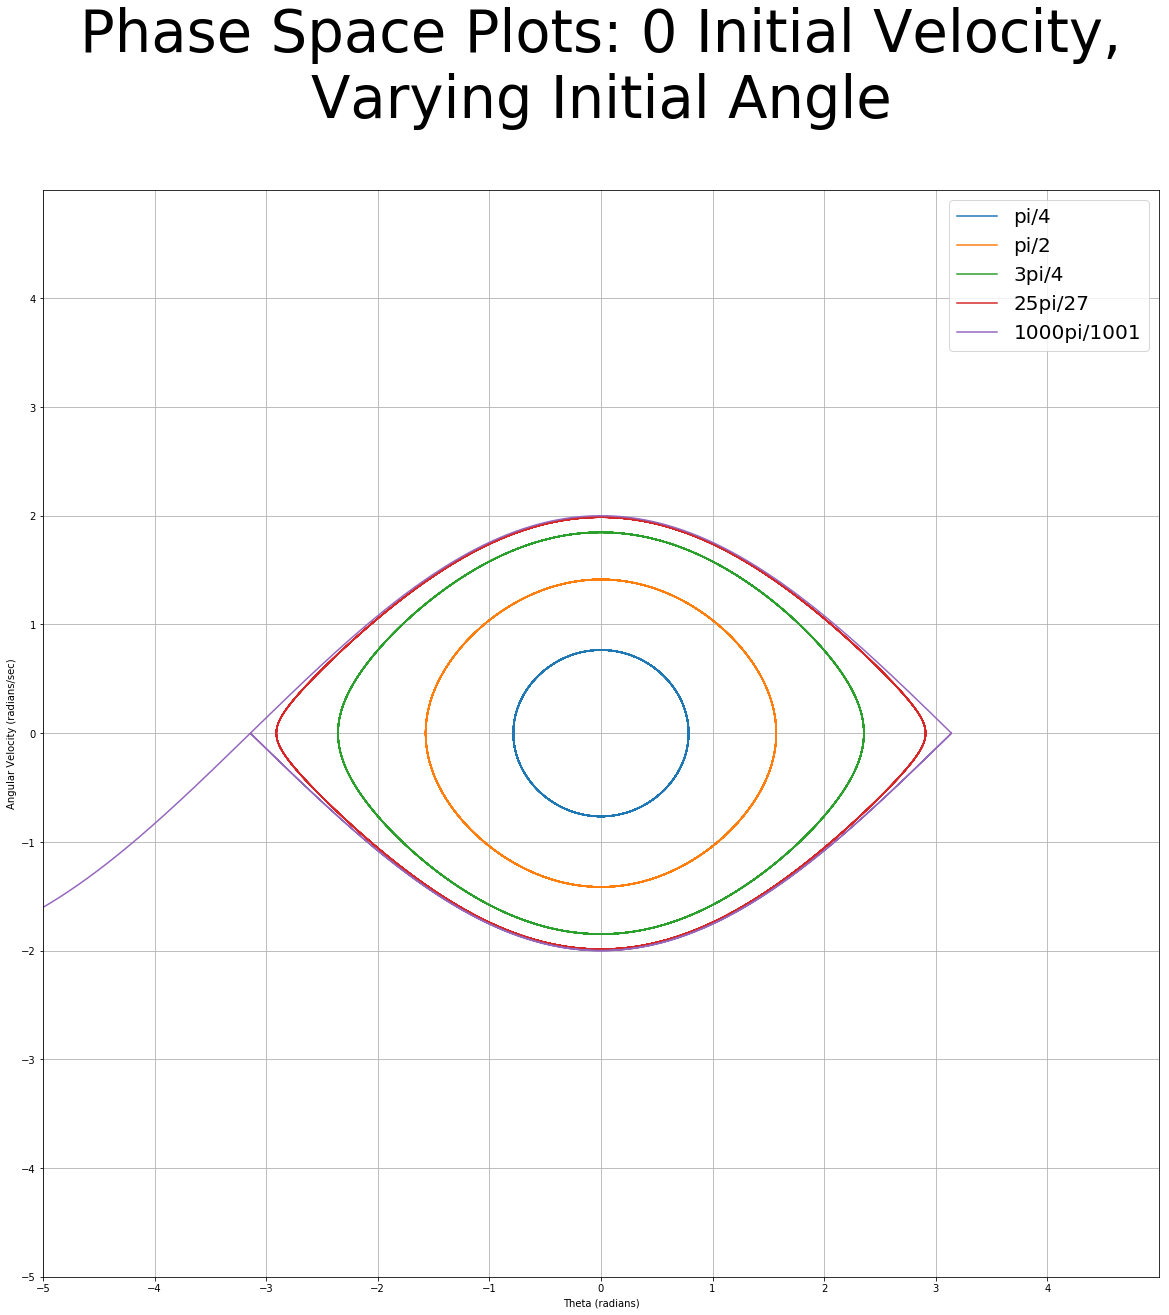

In [6]:
# Set up the angles to simulate the pendulum for
initialAngles = [(pi/4), (pi/2), ((3*pi)/4), ((1000*pi)/1080),\
                 ((1000*pi)/1001)];
numPlots = len(initialAngles)
pends = []
plt.clf()

# Build a vector of pendulums
for i in range(0,numPlots):
    pends.append(Pendulum(initialAngles[i], 0))    
    
# Run the simulation for each pendulum, then plot it in phase space over
# the previous plots
fig = plt.figure(figsize=(20,20));
for i in range(0,numPlots):
    pends[i] = runBashforth(pends[i])
    sub = fig.add_subplot(111)
    sub.plot(pends[i].theta, pends[i].vel)
    
# Set plot attributes and appearance
plt.xlim([-5,5])
plt.ylim([-5,5])
matplotlib.rcParams.update({'font.size':'36'})
plt.grid(b = True)
ticks = np.arange(-5,5,1)
sub.set_xticks(ticks)
sub.set_yticks(ticks)
plt.xlabel('Theta (radians)')
plt.ylabel('Angular Velocity (radians/sec)')
matplotlib.rcParams.update({'font.size':'48'})
plt.title\
('Phase Space Plots: 0 Initial Velocity,\nVarying Initial Angle\n')
matplotlib.rcParams.update({'font.size':'20'})
sub.legend(('pi/4','pi/2','3pi/4','25pi/27','1000pi/1001'))
plt.show()

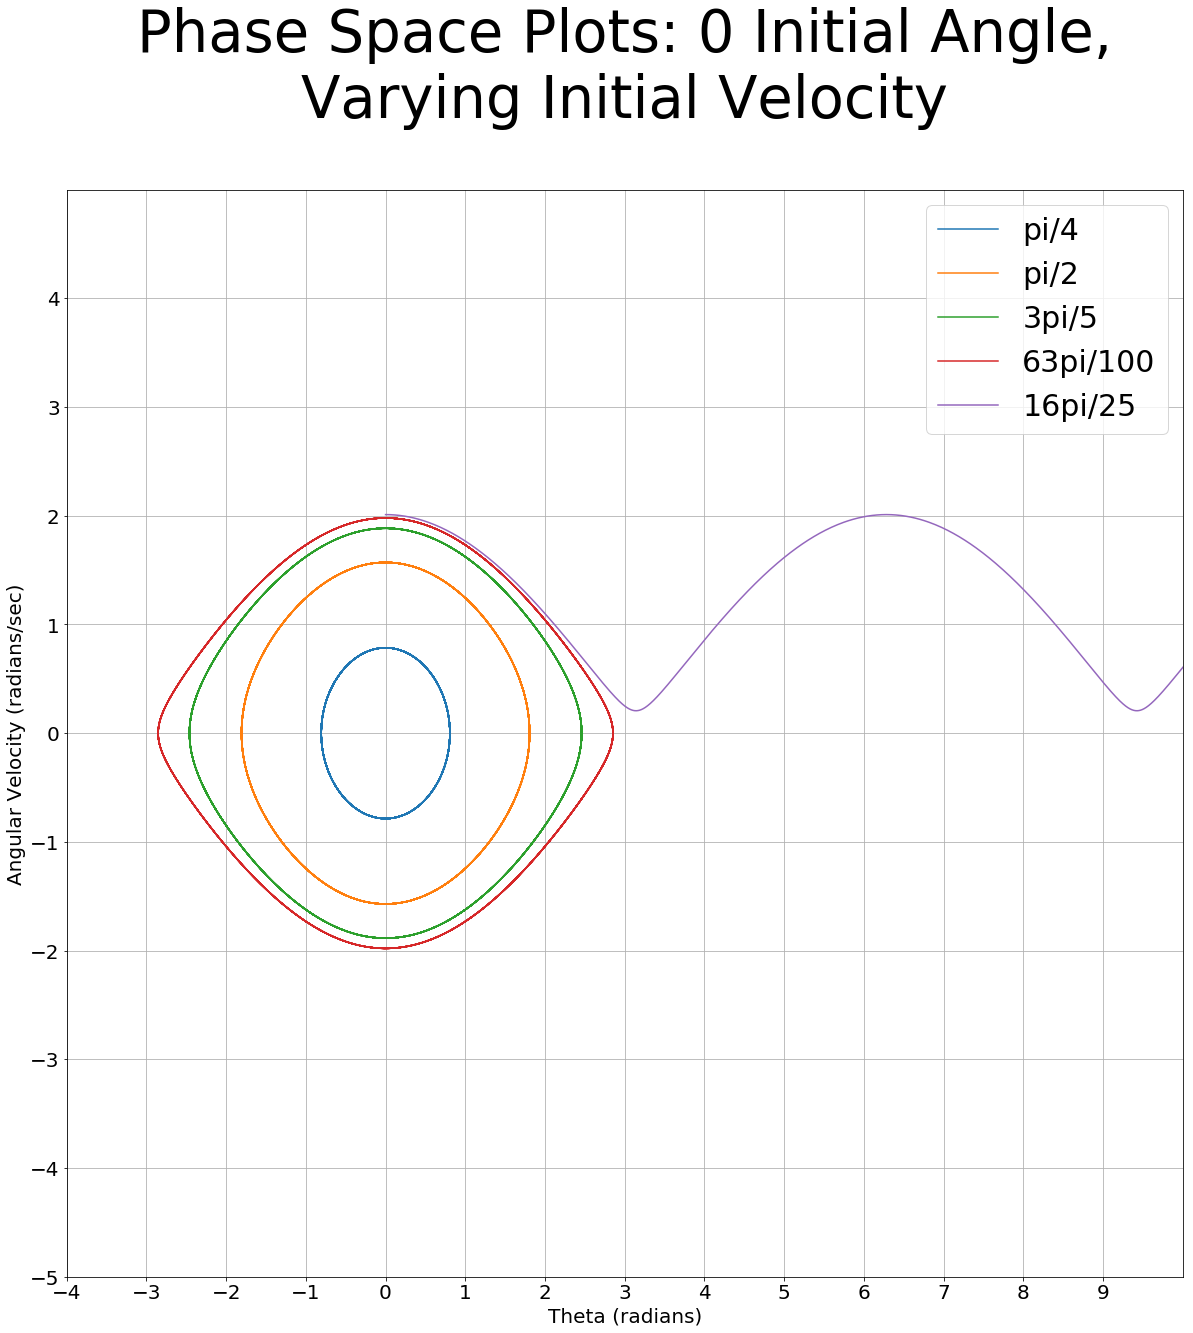

In [7]:
# Set up the velocities to simulate the pendulum for
initialVelocities = [(pi/4), (pi/2), ((3*pi)/5), ((63*pi)/100), ((64*pi)/100)];
numPlots = len(initialVelocities)
pends = []
plt.clf()

# Build a vector of pendulums
for i in range(0,numPlots):
    pends.append(Pendulum(0,initialVelocities[i]))    
    
# Run the simulation for each pendulum, then plot it in phase space over
# the previous plots
fig = plt.figure(figsize=(20,20));
for i in range(0,numPlots):
    pends[i] = runBashforth(pends[i])
    sub = fig.add_subplot(111)
    sub.plot(pends[i].theta, pends[i].vel)
    
# Set plot attributes and appearance
plt.xlim([-4,10])
plt.ylim([-5,5])
matplotlib.rcParams.update({'font.size':'36'})
plt.grid(b = True)
xticks = np.arange(-4,10,1)
yticks = np.arange(-5,5,1)
sub.set_xticks(xticks)
sub.set_yticks(yticks)
plt.xlabel('Theta (radians)')
plt.ylabel('Angular Velocity (radians/sec)')
matplotlib.rcParams.update({'font.size':'48'})
plt.title\
('Phase Space Plots: 0 Initial Angle,\nVarying Initial Velocity\n')
matplotlib.rcParams.update({'font.size':'30'})
sub.legend(('pi/4','pi/2','3pi/5','63pi/100','16pi/25'))
plt.show()

In [8]:
# Part 2: Generate phase space plots with the nonlinear sin(theta)
# behavior replaced by linear (theta) behavior

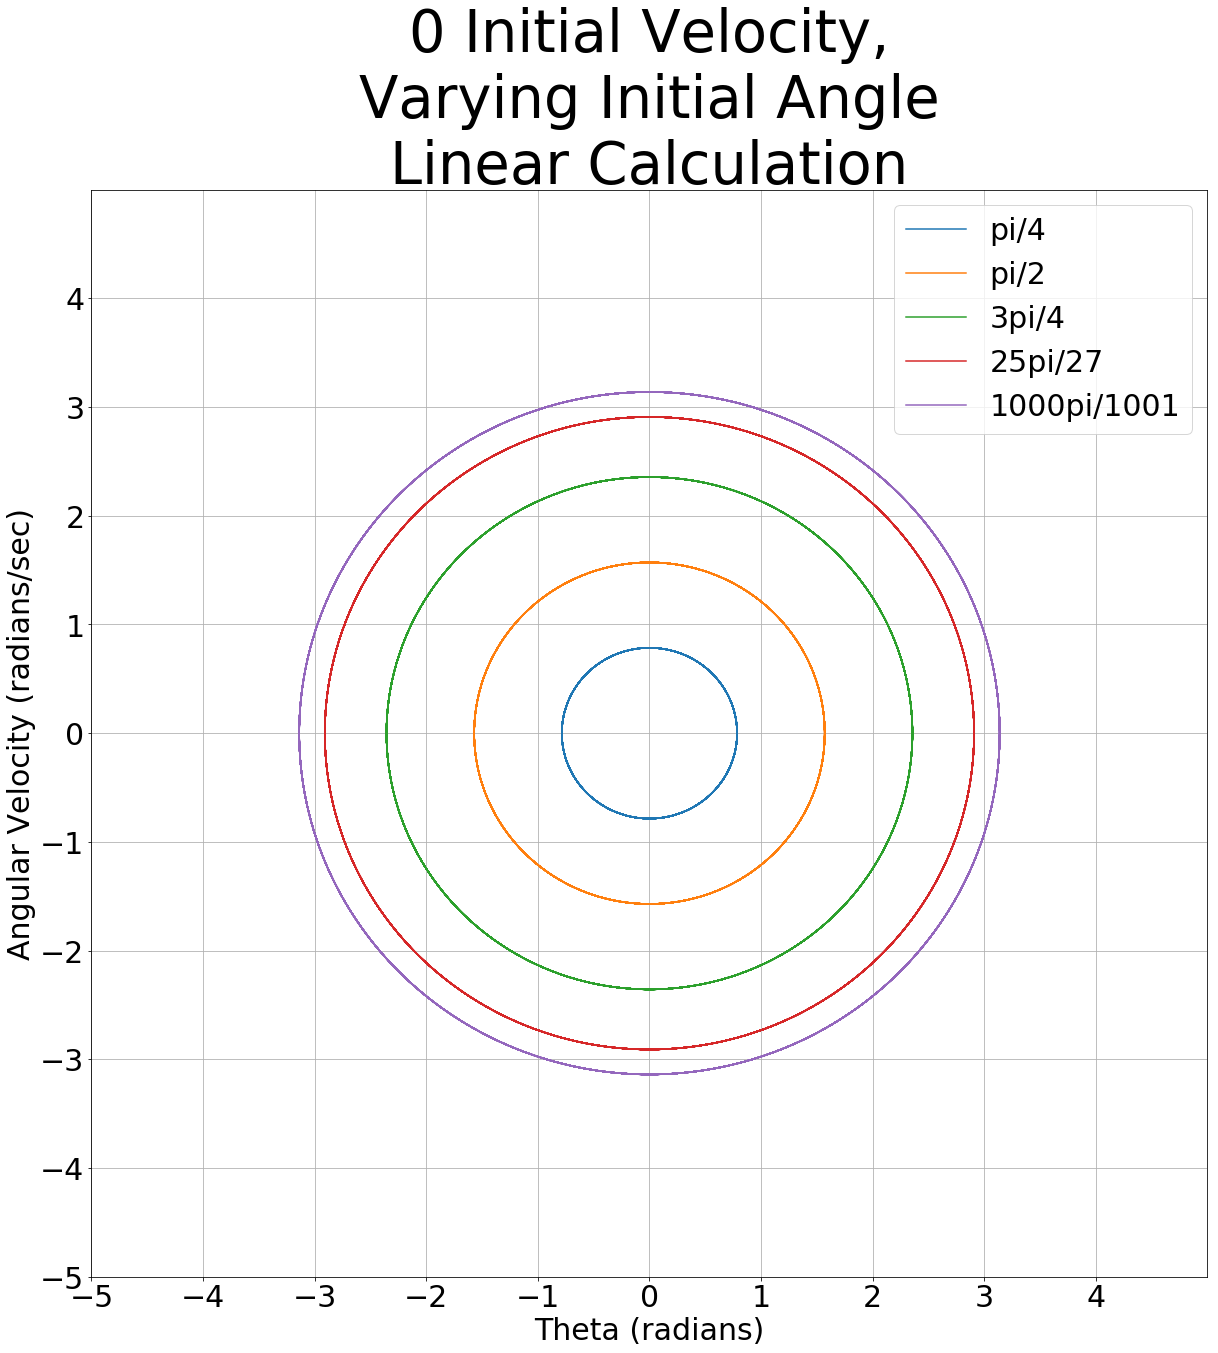

In [9]:
# Set up the angles to simulate the pendulum for
initialAngles = [(pi/4), (pi/2), ((3*pi)/4), ((1000*pi)/1080),\
                 ((1000*pi)/1001)];
numPlots = len(initialAngles)
pends = []
plt.clf()

# Build a vector of pendulums
for i in range(0,numPlots):
    pends.append(Pendulum(initialAngles[i], 0))    
    
# Run the simulation for each pendulum, then plot it in phase space over
# the previous plots
fig = plt.figure(figsize=(20,20));
for i in range(0,numPlots):
    pends[i] = runBashforthLinear(pends[i])
    sub = fig.add_subplot(111)
    sub.plot(pends[i].theta, pends[i].vel)
    
# Set plot attributes and appearance
plt.xlim([-5,5])
plt.ylim([-5,5])
matplotlib.rcParams.update({'font.size':'36'})
plt.grid(b = True)
ticks = np.arange(-5,5,1)
sub.set_xticks(ticks)
sub.set_yticks(ticks)
plt.xlabel('Theta (radians)')
plt.ylabel('Angular Velocity (radians/sec)')
matplotlib.rcParams.update({'font.size':'48'})
plt.title\
('0 Initial Velocity,\nVarying Initial Angle\nLinear Calculation')
matplotlib.rcParams.update({'font.size':'30'})
sub.legend(('pi/4','pi/2','3pi/4','25pi/27','1000pi/1001'))
plt.show()

In [10]:
# Part 3: Add a driving force t erm and plot phase space and time/
# position space

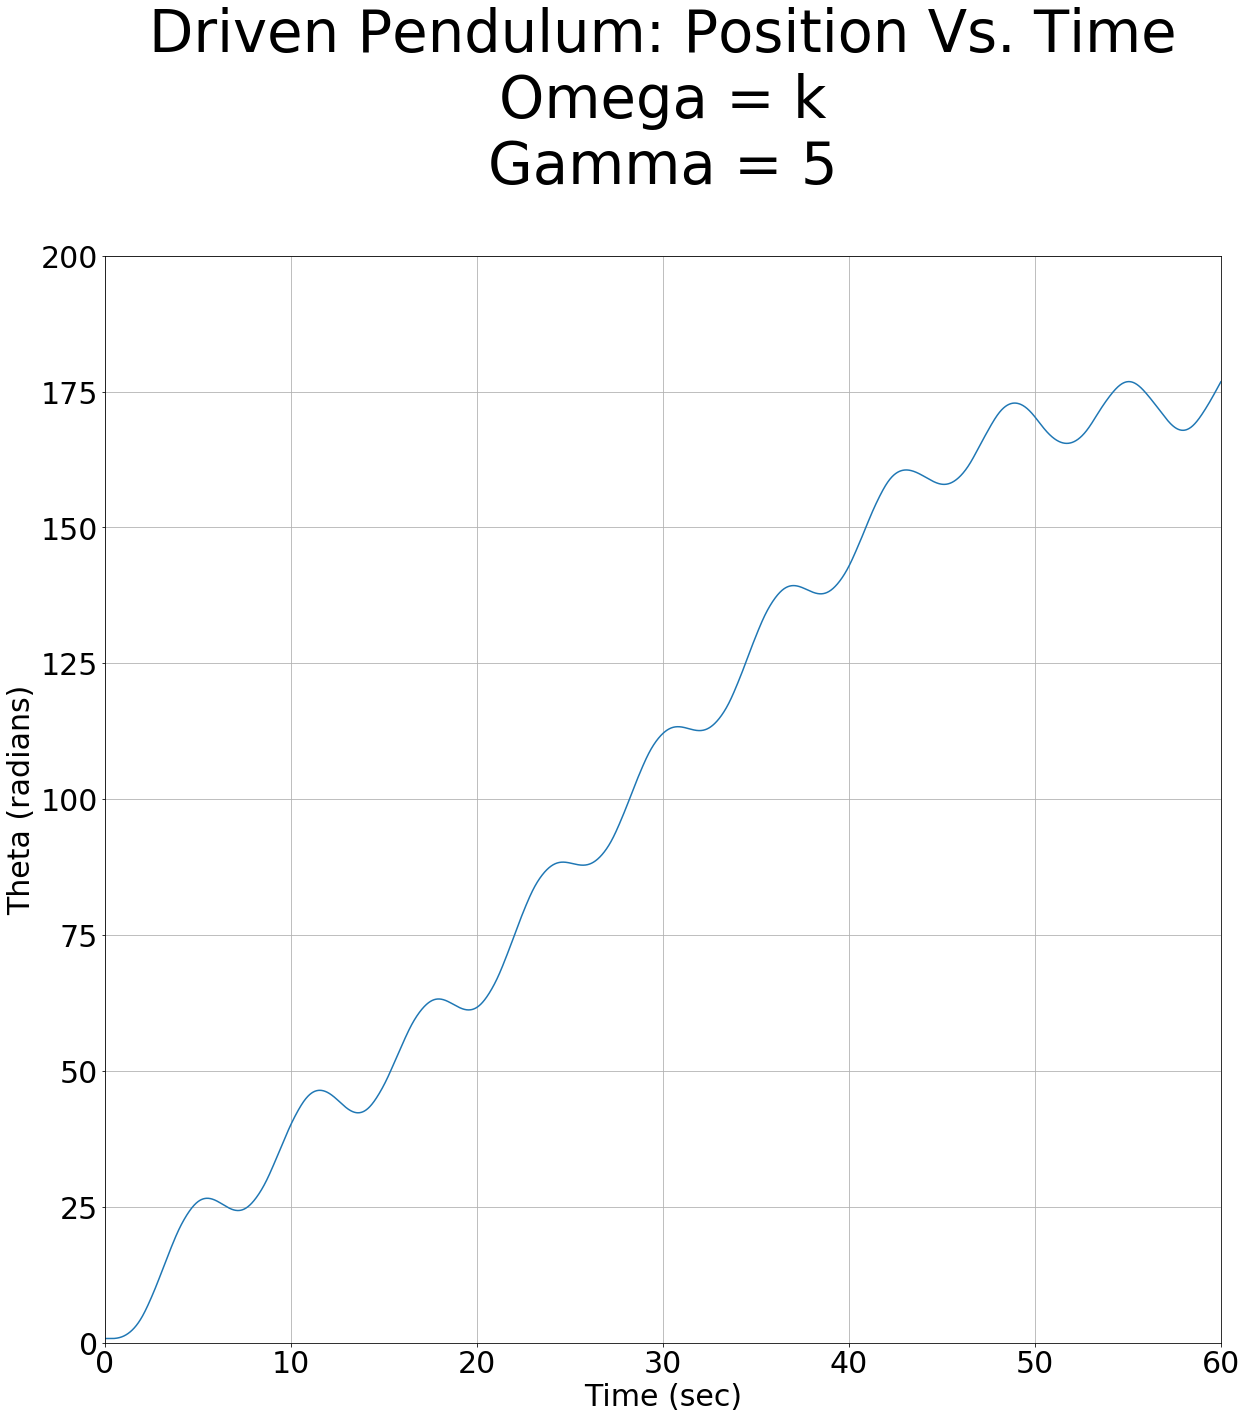

In [11]:
# Start the pendulum, quite simply, at pi/4 with 0 velocity
initialAngle = (pi/4)
plt.clf()

# Build a new pendulum
pend = (Pendulum(initialAngle, 0))    
    
# Run the simulation the pendulum, then plot its position vs. time
fig = plt.figure(figsize=(20,20));
pends = runBashforthDriven(pend)
plt.plot(pend.t, pend.theta)
    
# Set plot attributes and appearance
plt.xlim([0,60])
plt.ylim([0,200])
matplotlib.rcParams.update({'font.size':'50'})
plt.grid(b = True)
ticks = np.arange(-5,5,1)
sub.set_xticks(ticks)
sub.set_yticks(ticks)
plt.xlabel('Time (sec)')
plt.ylabel('Theta (radians)')
matplotlib.rcParams.update({'font.size':'48'})
plt.title('Driven Pendulum: Position Vs. Time\nOmega = k\nGamma = 5\n')
matplotlib.rcParams.update({'font.size':'20'})
sub.legend(('pi/4','pi/2','3pi/4','25pi/27','1000pi/1001'))
plt.show()

In [12]:
# Part 4: Examine the behavior of trajectories for varying gamma

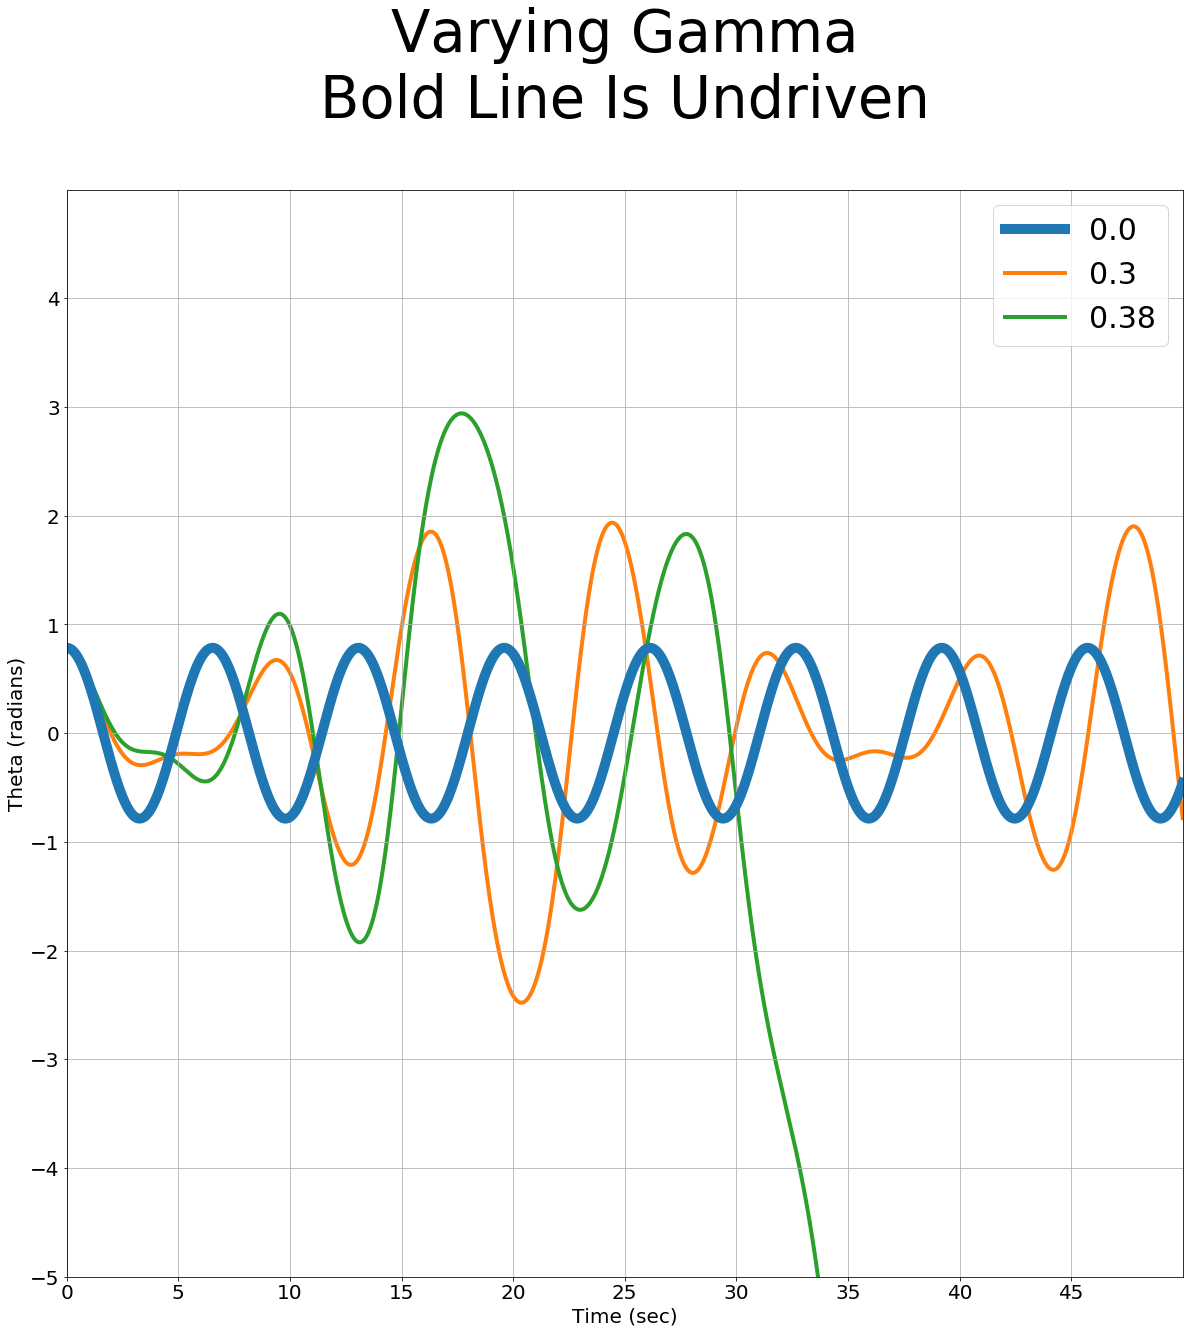

In [13]:
# Set up the values of gamma to simulate the pendulum for
gammas = [0, 0.3, 0.38];

# Decrease the number of iterations
iterations = 5000

# Start the pendulum at pi/4, 0 velocity
initialAngle = pi/4
numPlots = len(gammas)
pends = []
plt.clf()

# Build a vector of pendulums
for i in range(0,numPlots):
    pends.append(Pendulum(initialAngle, 0))    
    
# Run the simulation for each pendulum, then plot it in theta vs. time
# over the previous plots
fig = plt.figure(figsize=(20,20));
for i in range(0,numPlots):
    gamma = gammas[i]
    pends[i] = runBashforthDriven(pends[i])
    sub = fig.add_subplot(111)
    if i > 0:
        sub.plot(pends[i].t, pends[i].theta, linewidth = 4, zorder = 1)
    else:
        sub.plot(pends[i].t, pends[i].theta, linewidth = 10, zorder = 2)
    
# Set plot attributes and appearance
plt.xlim([0,50])
plt.ylim([-5,5])
matplotlib.rcParams.update({'font.size':'36'})
plt.grid(b = True)
xticks = np.arange(0,50,5)
yticks = np.arange(-5,5,1)
sub.set_xticks(xticks)
sub.set_yticks(yticks)
plt.xlabel('Time (sec)')
plt.ylabel('Theta (radians)')
matplotlib.rcParams.update({'font.size':'48'})
plt.title\
('Varying Gamma\nBold Line Is Undriven\n')
matplotlib.rcParams.update({'font.size':'30'})
sub.legend(('0.0','0.3', '0.38'))
plt.show()

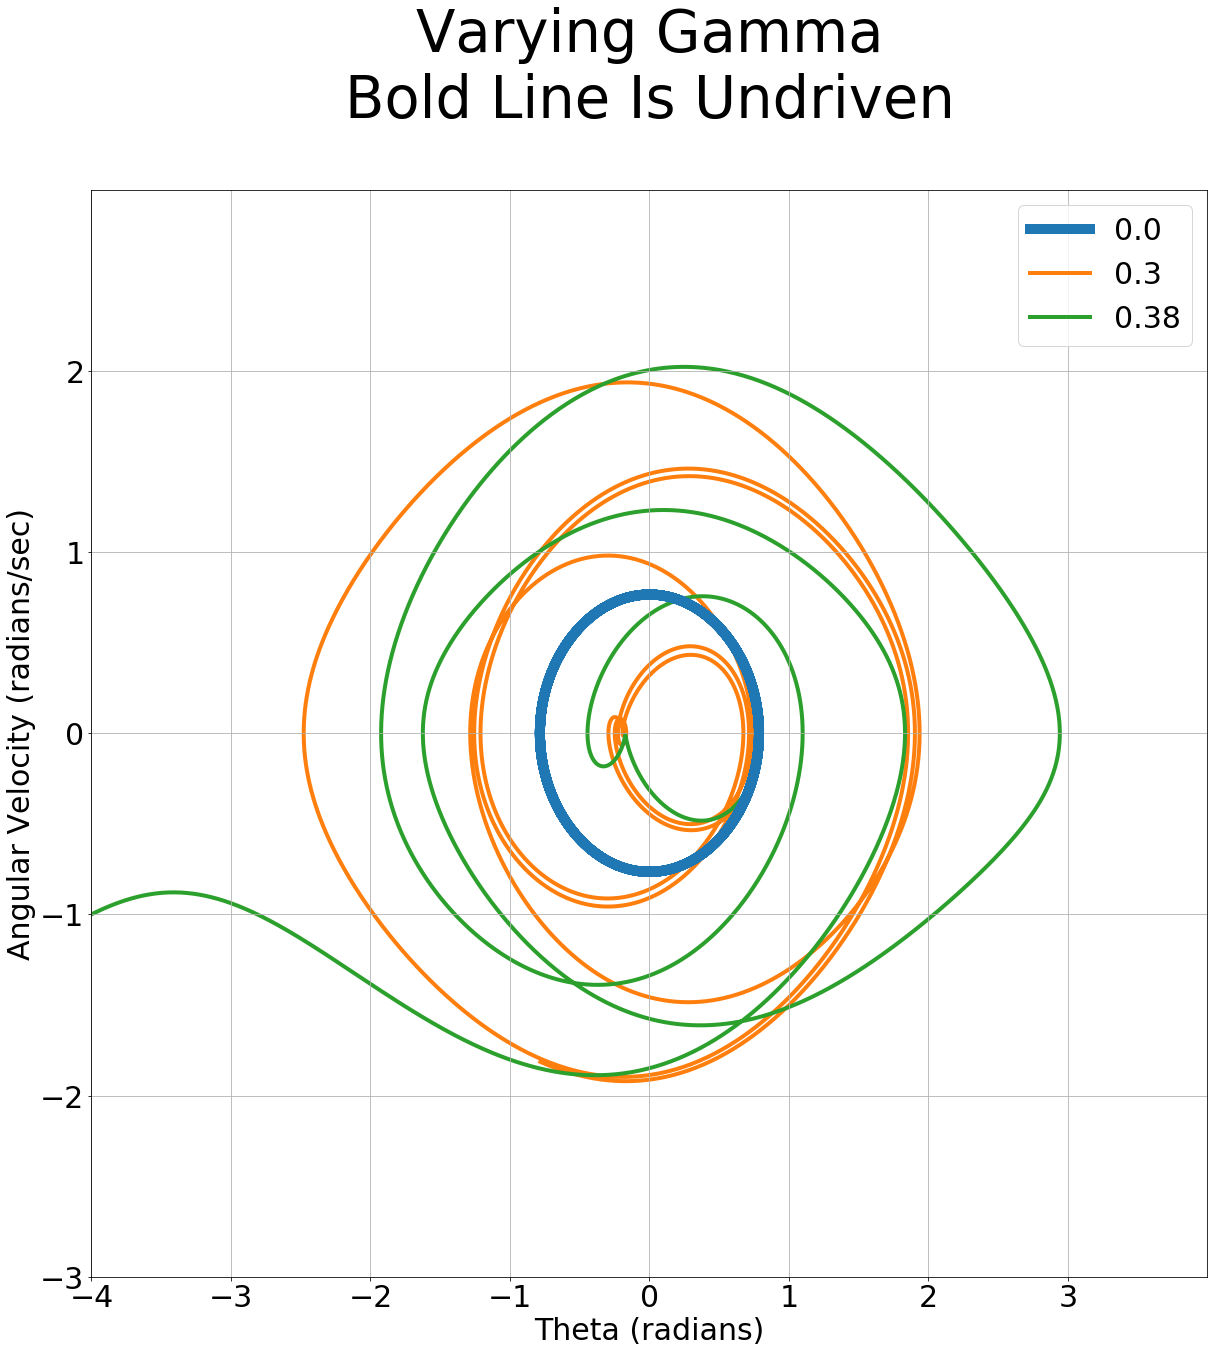

In [14]:
# Set up the values of gamma to simulate the pendulum for
gammas = [0, 0.3, 0.38];

# Decrease the number of iterations
iterations = 5000

# Start the pendulum at pi/4, 0 velocity
initialAngle = pi/4
numPlots = len(gammas)
pends = []
plt.clf()

# Build a vector of pendulums
for i in range(0,numPlots):
    pends.append(Pendulum(initialAngle, 0))    
    
# Run the simulation for each pendulum, then plot it in phase space over
# the previous plots
fig = plt.figure(figsize=(20,20));
for i in range(0,numPlots):
    gamma = gammas[i]
    pends[i] = runBashforthDriven(pends[i])
    sub = fig.add_subplot(111)
    if i > 0:
        sub.plot(pends[i].theta, pends[i].vel, linewidth = 4, \
                 zorder = 1)
    else:
        sub.plot(pends[i].theta, pends[i].vel, linewidth = 10, \
                 zorder = 2)
    
# Set plot attributes and appearance
plt.xlim([-4,4])
plt.ylim([-3,3])
matplotlib.rcParams.update({'font.size':'36'})
plt.grid(b = True)
xticks = np.arange(-4,4,1)
yticks = np.arange(-3,3,1)
sub.set_xticks(xticks)
sub.set_yticks(yticks)
plt.xlabel('Theta (radians)')
plt.ylabel('Angular Velocity (radians/sec)')
matplotlib.rcParams.update({'font.size':'48'})
plt.title\
('Varying Gamma\nBold Line Is Undriven\n')
matplotlib.rcParams.update({'font.size':'30'})
sub.legend(('0.0','0.3', '0.38'))
plt.show()

In [15]:
# Part 5: Examine which points in a (theta, gamma) cause divergence.

########################################################################
#  WARNING: DO NOT RUN THIS UNLESS YOU HAVE A LOT OF COMPUTER TIME ON  #
#  YOUR HANDS BECAUSE IT WILL EAT LIKE 20 MINUTES ON YOUR CPU AND YOU  #
#                            WILL CRY                                  #
########################################################################

# (That being said the results are real cool)

In [ ]:
# Set up necessary variable
numGammas = 100
numAngles = 100
numPlots = numGammas * numAngles
# This tracks which (theta, gamma) pairs diverge
diverges = np.zeros((numAngles,numGammas))

# Set up the values of gamma to simulate the pendulum for
gammas = np.linspace(0,1,numGammas)

# Set up the initial thetas to simulate the pendulum for
initialAngles = np.linspace(0,pi,numAngles)

# Set the number of iterations
iterations = 10000

plt.clf()

# Run all of the possible pendulums from these parameters
'''for i in range(0,numAngles):
    for j in range(0,numGammas):
        for k in range(0,iterations):
            gamma = gammas[j];
            pend = Pendulum(initialAngles[i], 0)
            pend = bashforthAdamsDriven(pend)
            if (abs(pend.theta[-1]) > pi):
                diverges[i,j] = k;
                break'''
for i in range(0,numAngles):
    for j in range(0,numGammas):
        gamma = gammas[j];
        pend = Pendulum(initialAngles[i], 0)
        pend = runBashforthDriven(pend)
        if (abs(pend.theta[-1]) > pi):
            diverges[i,j] = k;
    
# Set plot attributes and appearance
matplotlib.rcParams.update({'font.size':'12'})
plt.xlabel('Gamma (0 to 1)')
plt.ylabel('Initial Angle (0 to pi)')
plt.pcolor(diverges)
plt.title('Purple: Does not diverge\nYellow: Diverges')
plt.show()

In [17]:
# Part 6: Simulate the pendulum with an added damping term

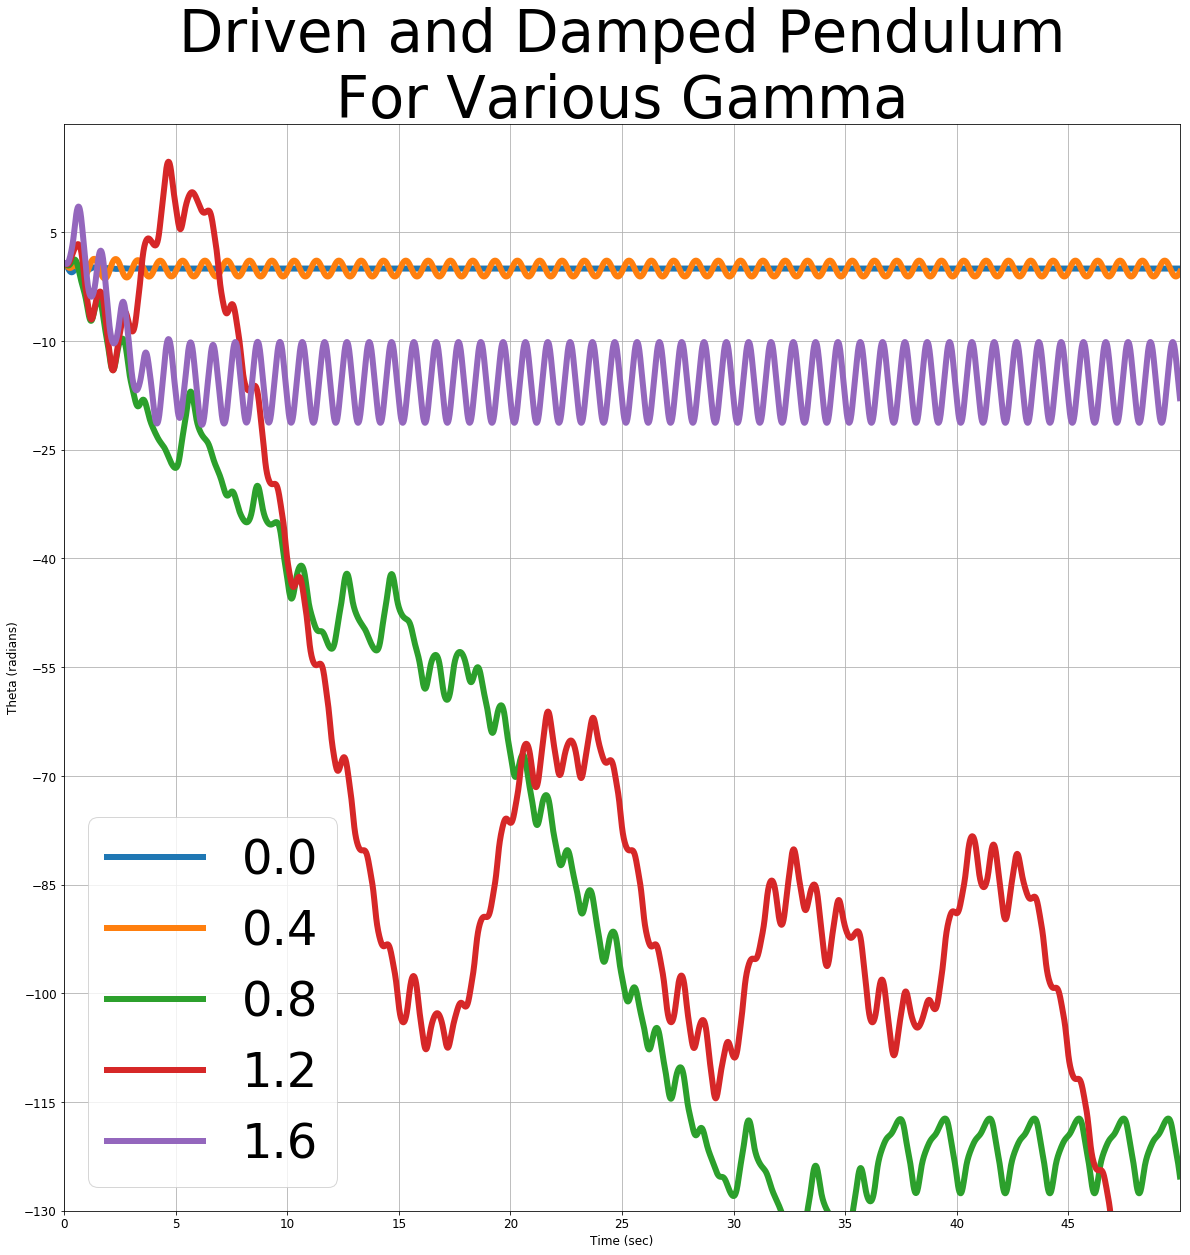

In [18]:
# Start the pendulum, quite simply, at pi/4 with 0 velocity
initialAngle = (pi/4)
plt.clf()

iterations = 5000

numGamma = 5;
gammas = np.linspace(0,2,numGamma);
omega = (2*pi)
k = (3*pi)
beta = ((3*pi)/4)
   
tDomain = plt.figure(figsize=(20,20));

for i in range(0,numGamma):
    # Run the simulation the pendulum, then plot its position vs. time
    pend = (Pendulum(initialAngle, 0)) 
    gamma = gammas[i]
    pend = runBashforthDrivenDamped(pend)
    sub = tDomain.add_subplot(111)
    sub.plot(pend.t, pend.theta, linewidth=6)
    
# Set plot attributes and appearance
plt.xlim([0,50])
plt.ylim([-130,20])
plt.grid(b = True)
xticks = np.arange(0,50,5)
yticks = np.arange(-130,20,15)
sub.set_xticks(xticks)
sub.set_yticks(yticks)
matplotlib.rcParams.update({'font.size':'50'})
plt.xlabel('Time (sec)')
plt.ylabel('Theta (radians)')
matplotlib.rcParams.update({'font.size':'48'})
plt.title('Driven and Damped Pendulum\nFor Various Gamma')
sub.legend(('0.0', '0.4','0.8','1.2','1.6','2.0'))
plt.show()

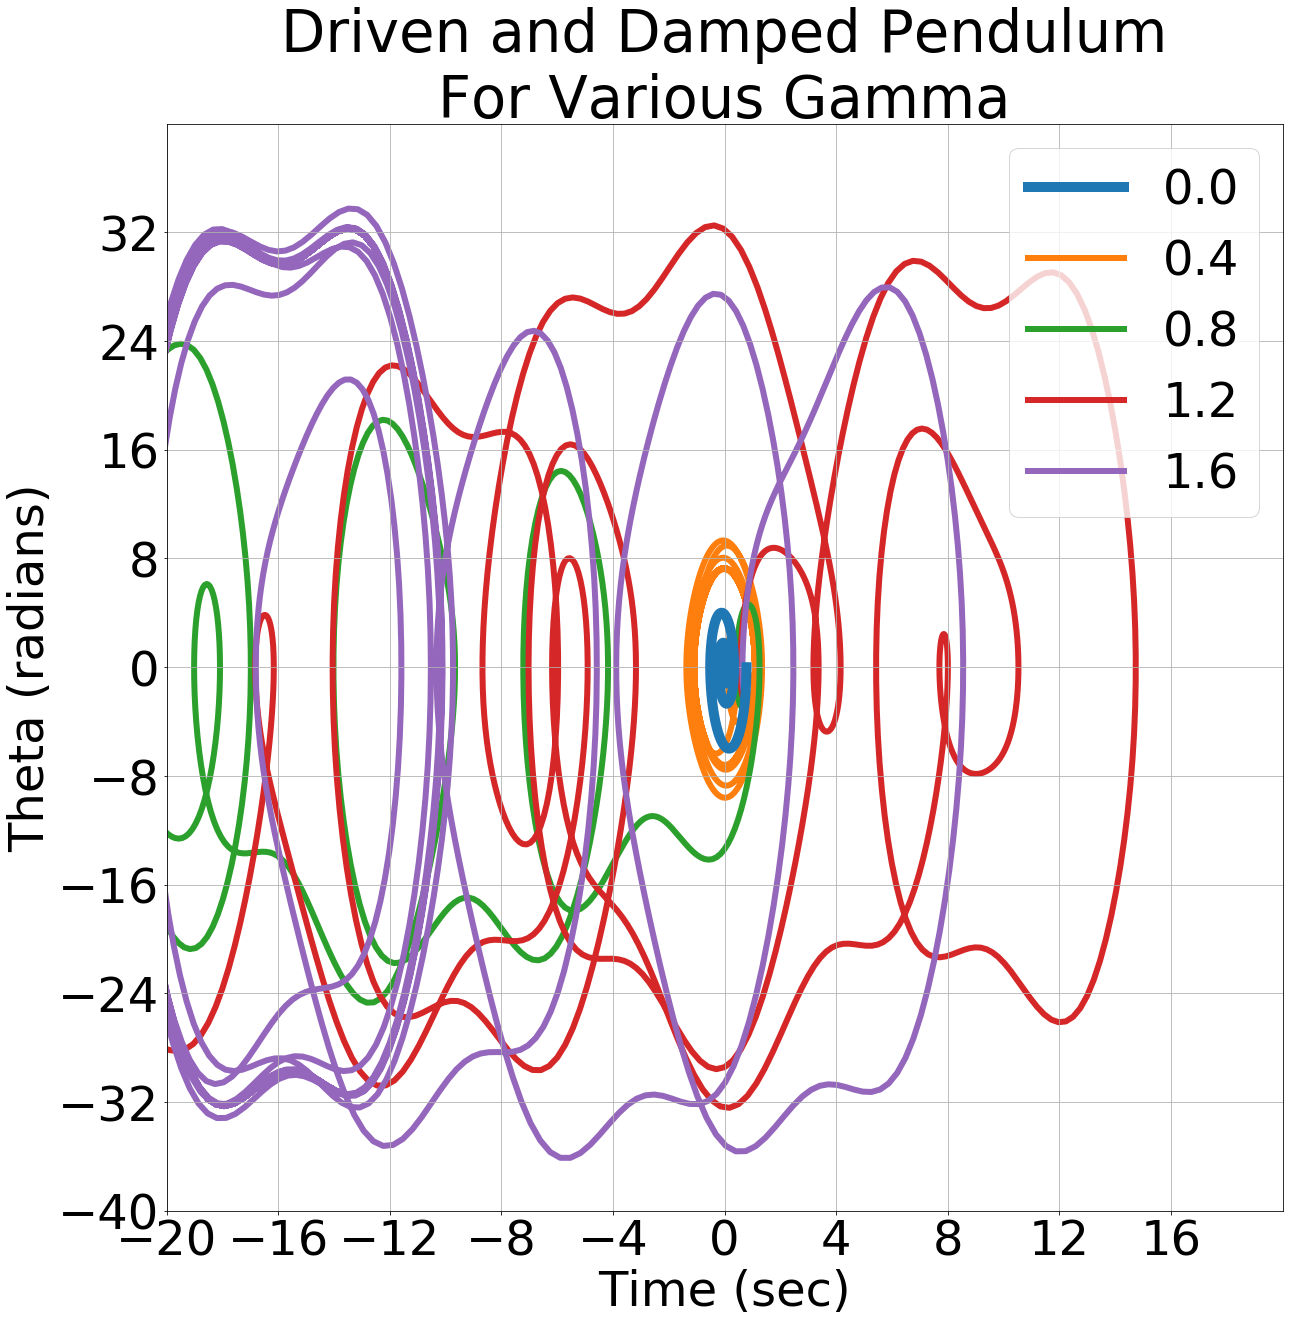

In [19]:
# Start the pendulum, quite simply, at pi/4 with 0 velocity
initialAngle = (pi/4)
plt.clf()

numGamma = 5;
gammas = np.linspace(0,2,numGamma);
omega = (2*pi)
k = (3*pi)
beta = ((3*pi)/4)
   
phaseSpace = plt.figure(figsize=(20,20));

for i in range(0,numGamma):
    # Run the simulation the pendulum, then plot its position vs. time
    pend = (Pendulum(initialAngle, 0)) 
    gamma = gammas[i]
    pend = runBashforthDrivenDamped(pend)
    sub = phaseSpace.add_subplot(111)
    if i > 0:
        sub.plot(pend.theta, pend.vel, linewidth=6, zorder = 1)
    else:
        sub.plot(pend.theta, pend.vel, linewidth=10, zorder = 2)        
    
# Set plot attributes and appearance
plt.xlim([-20,20])
plt.ylim([-40,40])
plt.grid(b = True)
xticks = np.arange(-20,20,4)
yticks = np.arange(-40,40,8)
sub.set_xticks(xticks)
sub.set_yticks(yticks)
matplotlib.rcParams.update({'font.size':'50'})
plt.xlabel('Time (sec)')
plt.ylabel('Theta (radians)')
matplotlib.rcParams.update({'font.size':'48'})
plt.title('Driven and Damped Pendulum\nFor Various Gamma')
sub.legend(('0.0', '0.4','0.8','1.2','1.6','2.0'))
plt.show()